/var/folders/j1/mx_b1gv16hqc_2gwb0vsfn540000gn/T/ipykernel_61607/1578824369.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs = yf.download('TCS.NS',start=s,end=e)
[*********************100%***********************]  1 of 1 completed
/var/folders/j1/mx_b1gv16hqc_2gwb0vsfn540000gn/T/ipykernel_61607/1578824369.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  wipro = yf.download('WIPRO.NS',start=s,end=e)
[*********************100%***********************]  1 of 1 completed
/var/folders/j1/mx_b1gv16hqc_2gwb0vsfn540000gn/T/ipykernel_61607/1578824369.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hcl = yf.download(' HCLTECH.NS',start=s,end=e)
[*********************100%***********************]  1 of 1 completed


['TCS' 'WIPRO' 'HCLTECH']


Enter Stock Name:  TCS


ADF Statistic: -0.8082442581694365
P-value: 0.8166883756943645
The series is NOT stationary.
ADF Statistic: -9.68330399678909
P-value: 1.1886871566149767e-16
The series is stationary.


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


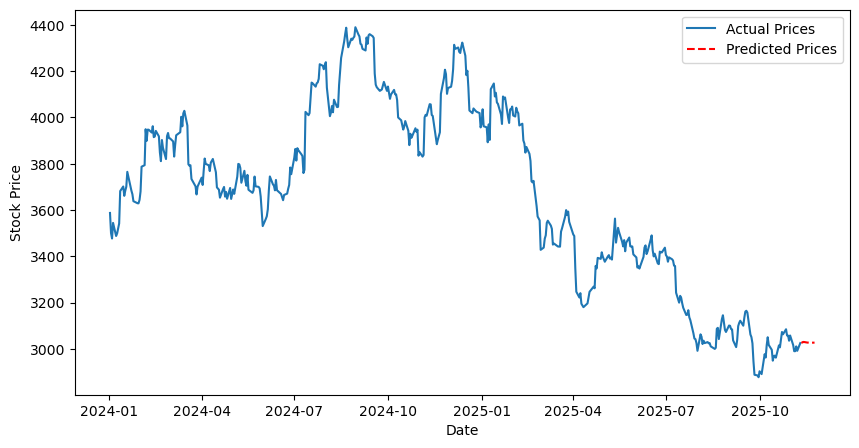

In [474]:
import yfinance as yf
import datetime as d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

s = d.datetime(2024,1,1)
e = d.datetime(2025,11,12)

tcs = yf.download('TCS.NS',start=s,end=e)
tcs.columns = tcs.columns.get_level_values(0)
tcs = tcs.reset_index()
tcs['Stock'] = 'TCS'

wipro = yf.download('WIPRO.NS',start=s,end=e)
wipro.columns = wipro.columns.get_level_values(0)
wipro = wipro.reset_index()
wipro['Stock'] = 'WIPRO'

hcl = yf.download(' HCLTECH.NS',start=s,end=e)
hcl.columns = hcl.columns.get_level_values(0)
hcl = hcl.reset_index()
hcl['Stock'] = 'HCLTECH'

infy = yf.download('INFY.NS',start=s,end=e)
infy.columns = infy.columns.get_level_values(0)
infy = infy.reset_index()
infy['Stock'] = 'INFOSYS'

df = pd.concat([tcs,wipro,hcl,infy],axis=0)
df = df.set_index('Date')

print(df.Stock.unique())
s = input("Enter Stock Name: ")
st= df[df.Stock == s]

st = st[['Close']]
st['Returns'] = st['Close'].pct_change()
st.dropna(inplace=True)


def check(timeseries):
    result = adfuller(timeseries.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary.")

check(st['Close'])

st['Close_Diff'] = st['Close'].diff().dropna()
check(st['Close_Diff'])

model = ARIMA(st['Close'], order=(5,1,0))  # AR(5), I(1), MA(0)
model_fit = model.fit()

forecast = model_fit.forecast(steps=10)
dates = pd.date_range(start=st.index[-1], periods=11, freq='B')[1:]

plt.figure(figsize=(10,5))
plt.plot(st['Close'], label="Actual Prices")
plt.plot(dates, forecast, label="Predicted Prices", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [ ]:
create tech - convert to streamlit for frontend - push on git